# **Exploratory Data Analysis of CO2 Emissions**

## **1. Introduction**

This notebook conducts an Exploratory Data Analysis (EDA) on a dataset of CO2 emissions. The primary objective is to understand the data's underlying structure, identify key features, and prepare the data for subsequent modeling tasks. This process includes importing necessary libraries, initializing experiment tracking with Weights & Biases (Wandb), loading and versioning the dataset, performing feature selection and data cleaning, and finally, visualizing the data to uncover insights.

## **2. Library Imports**

First, we import the necessary Python libraries for data manipulation, visualization, and experiment tracking.

In [1]:
import wandb
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import warnings

# Suppress warnings for a cleaner output
warnings.filterwarnings("ignore")

# Import the WANDB_KEY from a local file (ensure this file is in your .gitignore)
from my_key import WANDB_KEY

* **wandb**: Used for logging experiments, datasets, and models with Weights & Biases.
* **sys, os**: Provide functions for interacting with the operating system, such as path manipulation.
* **matplotlib.pyplot, seaborn**: Essential libraries for data visualization in Python.
* **pandas**: A powerful library for data manipulation and analysis, primarily used for its DataFrame structure.
* **numpy**: A fundamental package for numerical computation in Python.
* **scipy.stats.gaussian_kde**: Used for kernel density estimation, which is helpful in visualizing data distributions.

## **3. Initialization of Weights & Biases (Wandb)**

We initialize a new run in Weights & Biases to track our data loading and EDA process. This allows for reproducibility and collaboration.

In [2]:
# Log in to Wandb using the API key
wandb.login(key=WANDB_KEY)

# Initialize a new Wandb run
run = wandb.init(project="SBAI 2025", job_type="exploratory-data-analysis", save_code=True)

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\thomm\_netrc
wandb: Currently logged in as: thommasflores (thommasflores-ufrn) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


## **4. Data Loading and Versioning**

The raw dataset is loaded from a CSV file. To ensure data integrity and version control, we log the raw dataset as a `wandb.Artifact`.

In [3]:
# Define the path to the dataset
path = os.getcwd().split('code')[0]
data_path = os.path.join(path, 'data', 'emission_total.csv')

# Create a Wandb Artifact for the raw dataset
raw_dataset_artifact = wandb.Artifact(name='raw_dataset', type='dataset')

#Add the dataset file to the artifact
raw_dataset_artifact.add_file(data_path)

#Log the artifact to Wandb
wandb.log_artifact(raw_dataset_artifact, aliases=['raw'])

#Load the dataset into a pandas DataFrame
df = pd.read_csv(data_path)
df.head()

,CO2 (g/s) [estimated maf],CO2 (g/s) [maf],estimated_maf,intake_pressure,intake_temperature,latitude,longitude,maf,rpm,speed
0,0.809921,0.639659,3.798529,26.0,54.0,-5.793477,-35.198093,3.0,1568.0,43.0
1,1.796942,2.132196,8.427658,57.0,53.0,-5.793538,-35.198116,10.0,1582.0,43.0
2,2.199995,2.132196,10.317979,69.0,53.0,-5.793600,-35.198139,10.0,1600.0,43.0
3,1.226761,0.639659,5.753511,38.0,54.0,-5.793665,-35.198170,3.0,1625.0,44.0
4,0.756202,0.426439,3.546585,24.0,54.0,-5.793739,-35.198196,2.0,1586.0,45.0


This will display the first few rows of the DataFrame, giving us an initial look at the data.

## **5. Initial Data Exploration**

We examine the columns of the DataFrame to understand the available features.

In [4]:
df.columns

Index(['CO2 (g/s) [estimated maf]', 'CO2 (g/s) [maf]', 'estimated_maf',
       'intake_pressure', 'intake_temperature', 'latitude', 'longitude', 'maf',
       'rpm', 'speed'],
      dtype='object')

## **6. Feature Selection**

Based on the initial exploration, we select a subset of features that are most relevant for predicting CO2 emissions. We exclude redundant columns and those that are not directly related to the vehicle's operational parameters, such as latitude and longitude.

In [5]:
# Select the relevant features for the analysis
df_selected = df[['CO2 (g/s) [estimated maf]', 'intake_pressure', 'intake_temperature', 'rpm', 'speed']]
df_selected.head()

,CO2 (g/s) [estimated maf],intake_pressure,intake_temperature,rpm,speed
0,0.809921,26.0,54.0,1568.0,43.0
1,1.796942,57.0,53.0,1582.0,43.0
2,2.199995,69.0,53.0,1600.0,43.0
3,1.226761,38.0,54.0,1625.0,44.0
4,0.756202,24.0,54.0,1586.0,45.0


## **7. Data Cleaning and Preprocessing**

A crucial step in EDA is to check for and handle missing data.

In [6]:
# Check for the number of missing values in each column
missing_values = df_selected.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
CO2 (g/s) [estimated maf]    0
intake_pressure              0
intake_temperature           0
rpm                          0
speed                        0
dtype: int64


In this case, the selected features have no missing values, so no further imputation is needed.

## **8. Descriptive Statistics**

We compute descriptive statistics for the selected features to understand their central tendency, dispersion, and shape of the distribution.

In [7]:
# Display descriptive statistics for the selected DataFrame
df_selected.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CO2 (g/s) [estimated maf],10230.0,1.550791,0.980268,0.581262,0.857115,1.018373,2.136496,6.48638
intake_pressure,10230.0,54.107038,20.469358,21.000000,37.000000,52.000000,65.000000,102.00000
intake_temperature,10230.0,48.595503,6.281205,36.000000,44.000000,49.000000,52.000000,64.00000
rpm,10230.0,1375.421017,471.960132,651.000000,981.000000,1392.000000,1720.750000,3426.00000
speed,10230.0,30.008798,22.480100,0.000000,10.000000,30.000000,46.000000,79.00000


## **9. Clean Data Versioning**

After selecting the relevant features and ensuring the data is clean, we save this processed version of the dataset as a new `wandb.Artifact`. This allows us to easily access the clean data in future steps, such as model training.

In [8]:
# Define the path for the clean dataset
data_clean_path = os.path.join(path, 'data', 'emission_clean.csv')

# Save the selected DataFrame to a new CSV file
df_selected.to_csv(data_clean_path, index=False)

# Create a new Wandb Artifact for the clean dataset
clean_dataset_artifact = wandb.Artifact(name='clean_dataset', type='dataset')

# Add the clean dataset file to the artifact
clean_dataset_artifact.add_file(data_clean_path)

# Log the artifact to Wandb
wandb.log_artifact(clean_dataset_artifact, aliases=['clean'])

<Artifact clean_dataset>

## **10. Data Visualization**

Visualizations are essential for understanding the relationships between variables and the distribution of the data.

In [9]:
# Initialize WandB run
run = wandb.init(project="SBAI 2025", job_type="visualization", save_code=True)
os.makedirs("plots", exist_ok=True)

### **10.1. Histograms of Feature Distributions**

We plot histograms to visualize the distribution of each selected feature.

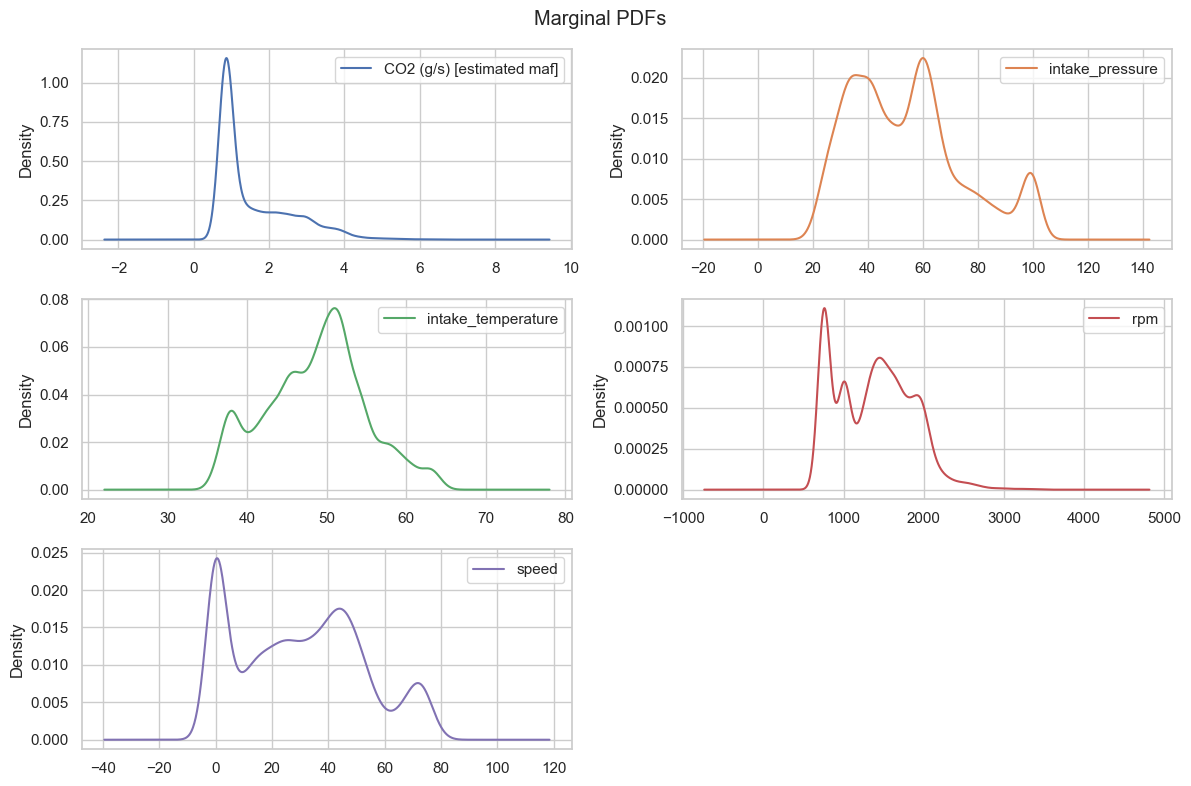

In [10]:
sns.set(style="whitegrid")
df_selected.plot(
    kind='density',
    subplots=True,
    layout=(3, 2),
    sharex=False,
    figsize=(12, 8),
    title='Marginal PDFs'
)
plt.tight_layout()

# Save plot
marginal_path = "plots/marginal_pdfs.png"
plt.savefig(marginal_path, bbox_inches='tight')
plt.show()
plt.close()

# Log to WandB
wandb.log({"Marginal PDFs": wandb.Image(marginal_path)})

### **10.2. Correlation Matrix**

A correlation matrix helps us understand the linear relationships between the variables.

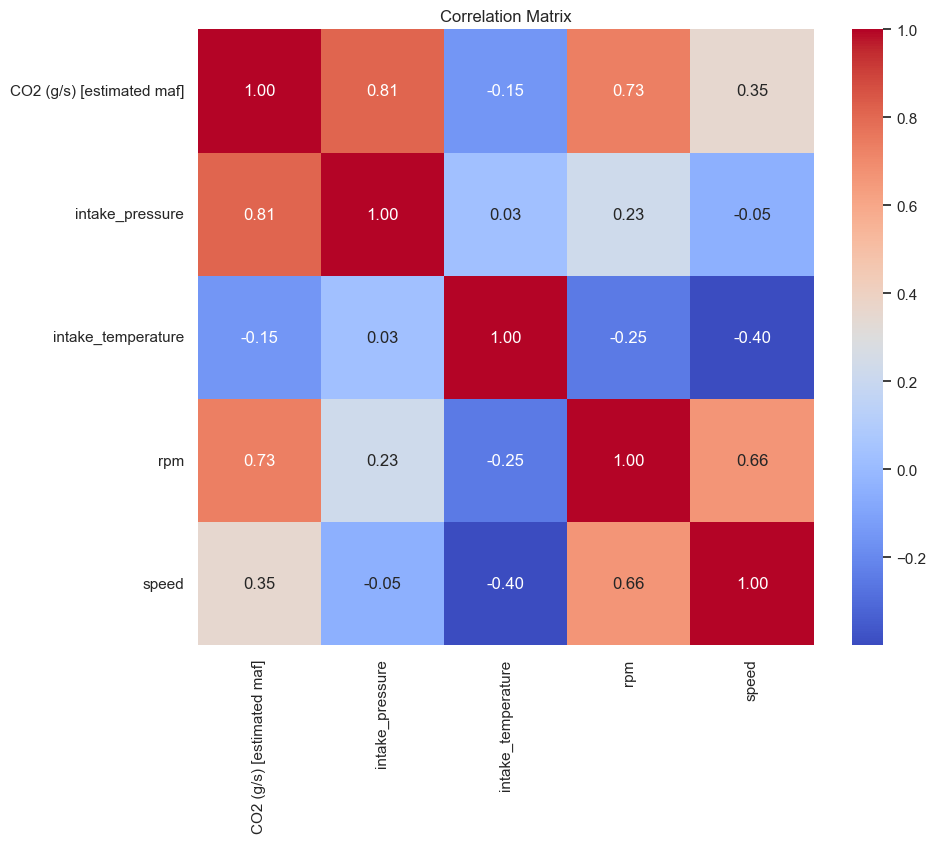

In [11]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_selected.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")

# Save plot
heatmap_path = "plots/correlation_heatmap.png"
plt.savefig(heatmap_path, bbox_inches='tight')
plt.show()
plt.close()

### **10.3. Scatter Plots of CO2 Emissions against Other Features**

We create scatter plots to visualize the relationship between the target variable (`CO2 (g/s) [estimated maf]`) and the other features.

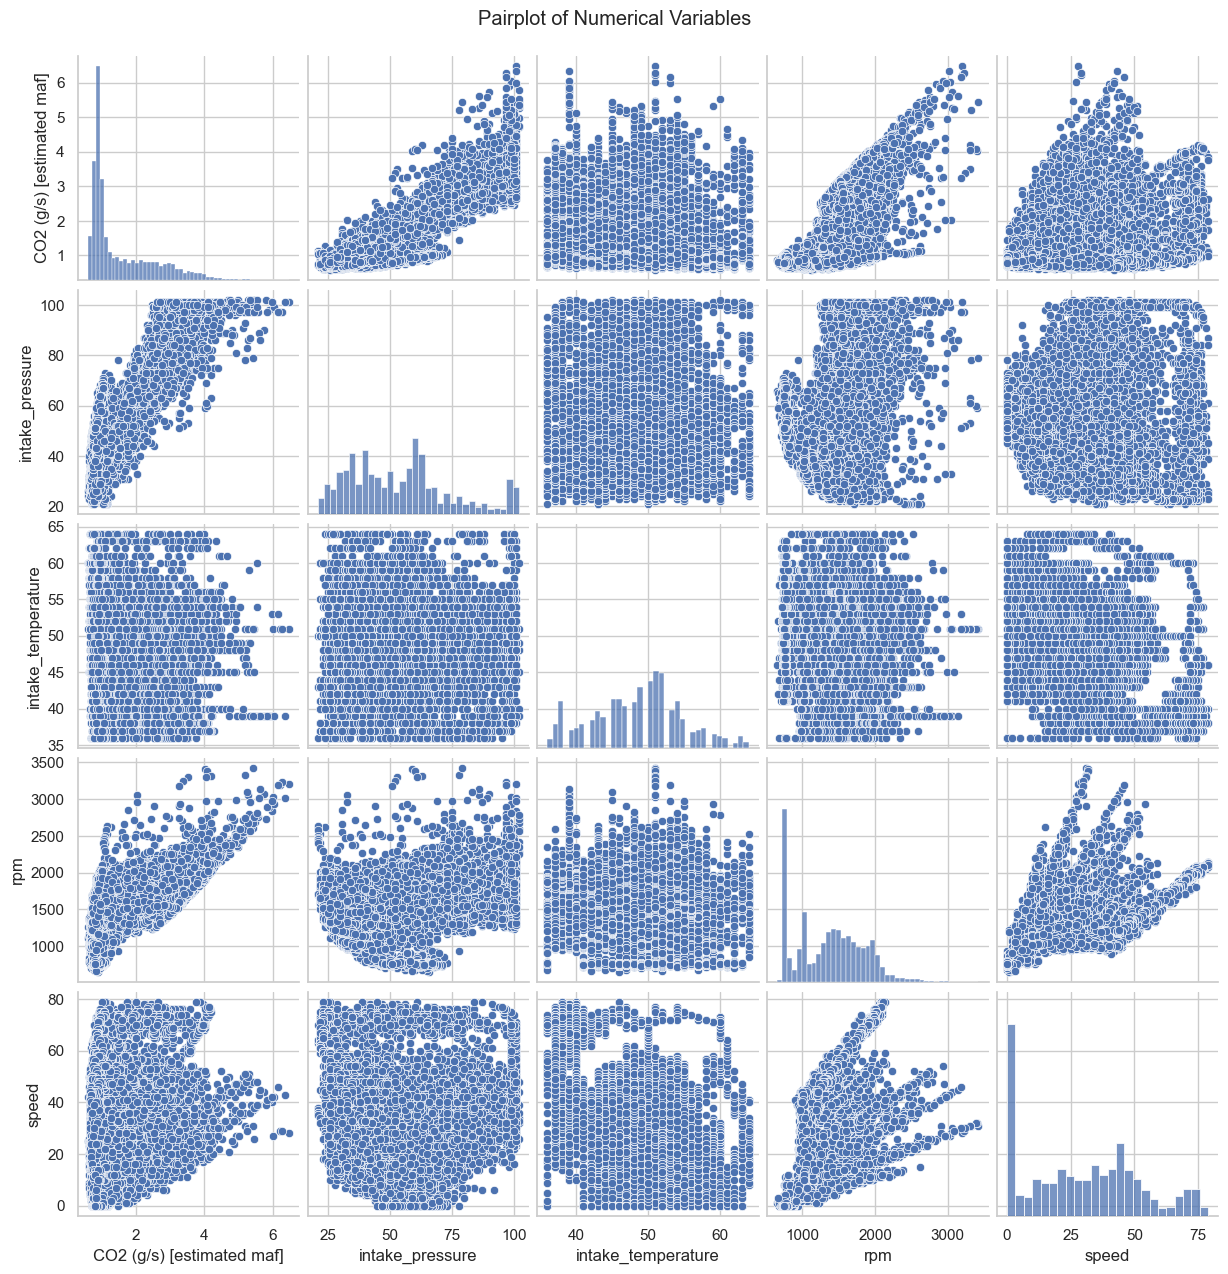

<Figure size 1000x800 with 0 Axes>

In [12]:
# Replace inf values and drop rows with NaNs
df_plot = df_selected.select_dtypes(include=['float64', 'int64']).replace([np.inf, -np.inf], np.nan).dropna()

pairplot = sns.pairplot(df_plot, kind="scatter")
# Save plot
plt.figure(figsize=(10, 8))
pairplot_path = "plots/pairplot.png"
pairplot.fig.suptitle("Pairplot of Numerical Variables", y=1.02)
pairplot.fig.savefig(pairplot_path, bbox_inches='tight')
plt.show()
plt.close()
# Log to WandB
wandb.log({"Pairplot": wandb.Image(pairplot_path)})

## **11. Conclusion of Exploratory Data Analysis**

This EDA has provided valuable insights into the CO2 emissions dataset. We have successfully:
* Imported necessary libraries and set up experiment tracking.
* Loaded and versioned the raw and cleaned datasets.
* Selected the most relevant features for our analysis.
* Verified that there is no missing data in the selected features.
* Analyzed the distributions and relationships of the features through descriptive statistics and visualizations.

The correlation matrix and scatter plots suggest strong relationships between CO2 emissions and features like `intake_pressure` and `rpm`, which will be useful for building a predictive model.

In [13]:
# Finish the Wandb run
wandb.finish()